In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pwf16 = pd.read_csv('data/DF_Intercambios.csv')
df_pwf25 = pd.read_csv('data/DF_HVDC.csv').drop('Nome Elo', axis=1)
df_pwf16.columns = ['Nome Elo', 'Dia', 'Hora', 'P(MW)', 'Q(Mvar)']
df_pwf25.columns = ['Nome Elo', 'Dia', 'Hora', 'P(MW)', 'Q(Mvar)']

df_pwf = pd.concat([df_pwf16, df_pwf25], axis=0).reset_index().drop('index', axis=1)
df_pwf = df_pwf.set_index(['Dia', 'Hora'])

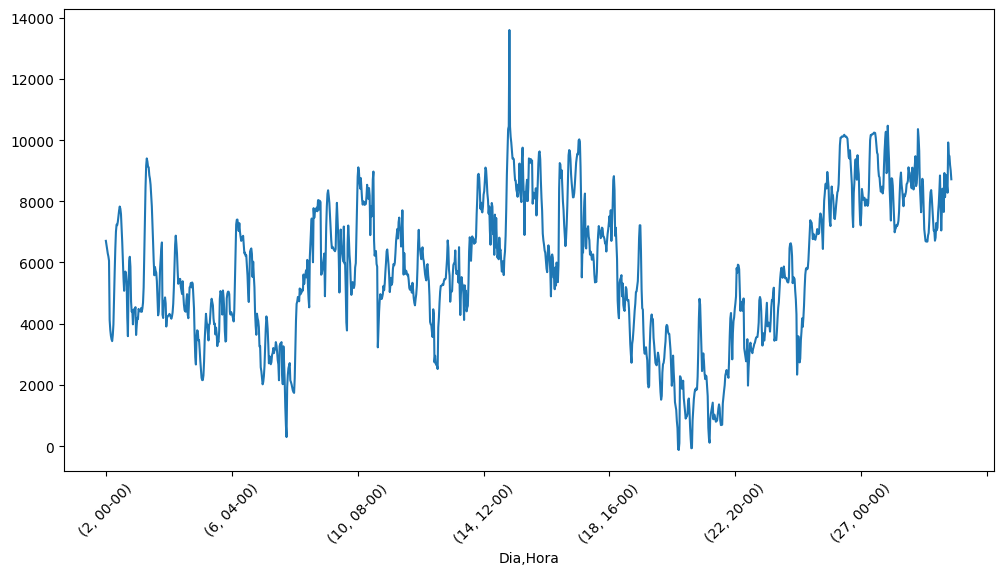

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
df_pwf[df_pwf['Nome Elo'] == 'EXP_NE']['P(MW)'].plot(ax=ax)
ax.tick_params(axis='x', labelrotation=45)
# ax.

In [4]:
# ['EXP_NE', 'Fluxo_NE-SE', 'Fluxo_N-S', 'Fluxo_SUL-SECO', 'Fluxo_NE-N', 'Fluxo_RSUL', 'Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_CPVBTB-PVEL', 'Elo_XINGU-SE']

In [143]:
class CreatePlots:
    def __init__(self):
        pass

    def persistency_curve(self, dataset, nome_elo=None, col=None, 
                          frm=None, to=None, path=None, ax_fontsize=None):
        
        dataset = pd.DataFrame(dataset[dataset['Nome Elo'] == nome_elo][col])

        fig, ax = plt.subplots(figsize=(12, 6))

        x = np.sort(np.array(dataset[col]))
        N = len(x)
        y = np.linspace(1, N, N)

        import_values = len(dataset[dataset[col] < 0])
        export_values = len(dataset[dataset[col] > 0])
        
        total_import = round((import_values / N) * 100, 2)
        total_export = round((export_values / N) * 100, 2)


        plt.plot(y[:import_values], x[:import_values], lw=3, c='red', label=f'Import: {total_import}% (-)')
        plt.plot(y[import_values:export_values], x[import_values:export_values], lw=3, c='blue', label=f'Export: {total_export}% (+)')
        ax.set_ylabel(f'{col}', weight='bold', fontsize=14) 
        ax.set_title(fr'Persistency Curve {frm}$\rightarrow${to}', weight='bold', fontsize=20)
        ax.set_xlabel('# Operation Points', weight='bold', fontsize=14)
 
        ax.axhline(y=0, color='k', ls='--', alpha=0.3)
        ax.tick_params(color='black', labelcolor='black')
        ax.grid(visible=True, alpha=0.3)

        ax.tick_params(axis='both', which='major', labelsize=ax_fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=ax_fontsize)

        ax.legend(bbox_to_anchor=(0.01, 1.00), fontsize=13, 
          loc='upper left', fancybox=True, shadow=True)
        
        plt.tight_layout()

        if path != None:
            plt.savefig(f'{path}/PC_{nome_elo}')

        plt.show()

    def box_plots(self, dataset, col=None, path=None, ax_fontsize=None):
        import warnings
        warnings.filterwarnings('ignore')

        fig, ax = plt.subplots(1, 1, figsize=(15, 6))
        ax = sns.boxplot(
            data=dataset, 
            x="Nome Elo", 
            y=col, 
            notch=True, 
            showcaps=False,
            flierprops={"marker": "x"}, 
            hue=df_pwf['Nome Elo'],
            palette=sns.color_palette("hls", 8)
        )

        ax.set_ylabel(f'{col}', weight='bold', fontsize=13)
        ax.set_xlabel('Nome Elo', weight='bold', fontsize=13)
        ax.grid(True, alpha=0.3)
        ax.set_xticklabels(dataset['Nome Elo'].unique(), rotation=30)

        ax.tick_params(axis='both', which='major', labelsize=ax_fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=ax_fontsize)

        plt.tight_layout()

        if path != None:
            plt.savefig(f'{path}/BoxPlot_{col}')

        plt.show()

    def violin_plots(self, dataset, col=None, path=None, ax_fontsize=None):
        import warnings
        warnings.filterwarnings('ignore')

        fig, ax = plt.subplots(1, 1, figsize=(15, 6))
        ax = sns.violinplot(
            data=dataset, 
            x="Nome Elo", 
            y=col, 
            hue=df_pwf['Nome Elo'],
            palette=sns.color_palette("hls", 8)
        )

        ax.set_ylabel(f'{col}', weight='bold', fontsize=13)
        ax.set_xlabel('Nome Elo', weight='bold', fontsize=13)
        ax.grid(True, alpha=0.3)
        ax.set_xticklabels(dataset['Nome Elo'].unique(), rotation=30)

        ax.tick_params(axis='both', which='major', labelsize=ax_fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=ax_fontsize)

        plt.tight_layout()

        if path != None:
            plt.savefig(f'{path}/ViolinPlot_{col}')

        plt.show()
    
    def create_heatmap(self):
        pass



    

    def create_contourplot(self):
        pass

    def flow_profiles(self):
        pass

    

path = 'results'
plotter = CreatePlots()
# plotter.persistency_curve(dataset=df_pwf, 
#                           nome_elo='Fluxo_RSUL', 
#                           col='P(MW)', 
#                           frm='R', 
#                           to='SUL', 
#                           path=path, 
#                           ax_fontsize=13)
# plotter.box_plots(dataset=df_pwf, 
#                   col='P(MW)', 
#                   path=path, 
#                   ax_fontsize=11)
# plotter.violin_plots(dataset=df_pwf, 
#                   col='P(MW)', 
#                   path=path, 
#                   ax_fontsize=11)